<style>
.shaded-area {
    background-color: #f0fff0; /*#f0fff0 for green, ffeded for red */
    width: 100%;
    margin: 0;
    padding: 10px;
    box-sizing: border-box;
}


</style>
</div>
<div class="shaded-area">




<div style="text-align: left; color: black;">

<b style="font-size: 28px;">ECON 980: Computational Methods For Economics (Spring 2024)</b></p>
<b style="font-size: 28px;">Mapping in Python</b>



<a id='about-py'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Kansas_State_University_wordmark.svg/1280px-Kansas_State_University_wordmark.svg.png" alt="QuantEcon">
        </a>
<a id='index-0'></a>

</div>


<!-- -->


**Co-author**

> - [WALTER AC-PANGAN (*Kansas State university*)](https://github.com/walteracp)  



In [5]:
# Uncomment following line to install the package if needed (only for first time users)
#! pip install fiona geopandas xgboost gensim folium pyLDAvis descartes


  Obtaining dependency information for fiona from https://files.pythonhosted.org/packages/7f/ba/f40c12e2a6b4a106ab16b1adfee2bf0aa6c27aaa72f928bf52b71734f9d8/fiona-1.9.6-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.5 kB 217.9 kB/s eta 0:00:01
     --------------- ---------------------- 20.5/51.5 kB 217.9 kB/s eta 0:00:01
     -------------------------------------  51.2/51.5 kB 238.1 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 202.4 kB/s eta 0:00:00
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/90/37/08e416c9915dcf7d53deb0fbdb702266902c584617dfa6e6c84fb2fc6ee3/geopandas-0.14.3-py3-none-any.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ec

In [6]:
# Upload the package to the environment
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

## Mapping in Python

In this lecture, we will use a new package, `geopandas`, to create maps.

Maps are really quite complicated… We are trying to project a spherical surface onto a flat figure, which is an
inherently complicated endeavor.

Luckily, `geopandas` will do most of the heavy lifting for us.



In [5]:
from IPython.display import Image
Image(url='https://sciencenotes.org/wp-content/uploads/2022/06/Latitude-and-Longitude.png')

In [6]:
from IPython.display import Image
Image(url='https://www.geographyrealm.com/wp-content/uploads/2022/07/geographic-coordinates-positive-or-negative-map.png')

Let’s start with a DataFrame that has the latitude and longitude coordinates of various South American cities.

Our goal is to turn them into something we can plot – in this case, a `GeoDataFrame`.

In [9]:
df = pd.DataFrame({
    'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas', 'Quito'],
    'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela', 'Ecuador'],
    'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48, -0.21],
    'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86, -78.5]
})



print(df.dtypes)
df.head(10)

City          object
Country       object
Latitude     float64
Longitude    float64
dtype: object


,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86
5,Quito,Ecuador,-0.21,-78.50


In order to map the cities, we need tuples of coordinates.

We generate them by zipping the latitude and longitude together to store them in a new column named `Coordinates`.

In [10]:
df["Coordinates"] = list(zip(df.Longitude, df.Latitude))
df.head()



,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,"(-58.66, -34.58)"
1,Brasilia,Brazil,-15.78,-47.91,"(-47.91, -15.78)"
2,Santiago,Chile,-33.45,-70.66,"(-70.66, -33.45)"
3,Bogota,Colombia,4.60,-74.08,"(-74.08, 4.6)"
4,Caracas,Venezuela,10.48,-66.86,"(-66.86, 10.48)"


Our next step is to turn the tuple into a `Shapely` `Point` object.
We will do this by applying Shapely’s `Point` method to the `Coordinates` column.

In [11]:
df["Coordinates"] = df["Coordinates"].apply(Point)
#df.dtypes
df.head()




,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


Finally, we will convert our `DataFrame` into a `GeoDataFrame` by calling the
`geopandas.DataFrame` method.

Conveniently, a `GeoDataFrame` is a data structure with the convenience of a
normal DataFrame but also an understanding of how to plot maps.

In the code below, we must specify the column that contains the geometry data.

See this excerpt from the docs

> The most important property of a GeoDataFrame is that it always has one GeoSeries column that
holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a
spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this
commands will always act on the “geometry” column.

In [13]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates") #This line indicate the coordinates are in the geometry column
gdf.head()



,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


In [14]:
# Doesn't look different than a vanilla DataFrame...let's make sure we have what we want
print('gdf is of type:', type(gdf))

# And how can we tell which column is the geometry column?
print('\nThe geometry column is:', gdf.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: Coordinates


### Plotting a Map

Great, now we have our points in the GeoDataFrame.

Let’s plot the locations on a map.

This will require 3 steps

1. Get the map  
1. Plot the map  
1. Plot the points (our cities) on the map  

#### 1. Get the map

An organization called [Natural Earth](https://www.naturalearthdata.com/) compiled the map data
that we use here.

The file provides the outlines of countries, over which we’ll plot the city locations
from our GeoDataFrame.

Luckily, `geopandas` already comes bundled with this data, so we don’t
have to hunt it down!

In [15]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

C:\Users\Walter\AppData\Local\Temp\ipykernel_16380\857955606.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


`world` is a GeoDataFrame with the following columns:

- `pop_est`: Contains a population estimate for the country  
- `continent`: The country’s continent  
- `name`: The country’s name  
- `iso_a3`: The country’s 3 letter abbreviation (we made this the index)  
- `gdp_md_est`: An estimate of country’s GDP  
- `geometry`: A `POLYGON` for each country (we will learn more about these soon)  

In [13]:
world.geometry.name

#Notice that the geometry for this GeoDataFrame is stored in the `geometry` column.

'geometry'

In [16]:
#Optional Create a Directory of Country Names
Country_names = world.reset_index()[['iso_a3', 'name']]
Country_names = Country_names.sort_values('name')


In [15]:
from IPython.display import Image
Image(url='https://geobgu.xyz/presentations/p_2023_ogh/images/simple_feature_types.svg')



## Note: Points, LineStrings, Polygons and Multipolygons

Instead of points (as our cities are), the geometry objects are now polygons.

A polygon is what you already likely think it is – a collection of ordered points
connected by straight lines.

The smaller the distance between the points, the more readily the polygon can approximate
non-linear shapes.

Let’s see an example of a polygon.

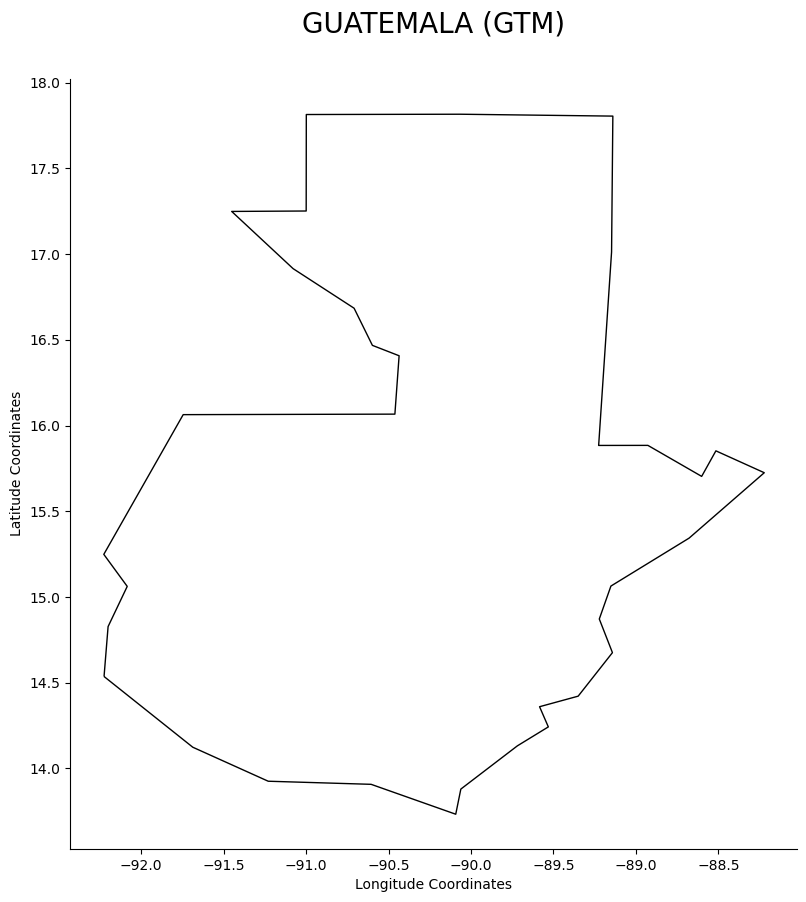

In [16]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("iso_a3 == 'GTM'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('Longitude Coordinates')
gax.set_ylabel('Latitude Coordinates')
gax.set_title('GUATEMALA (GTM)', fontsize=20, y=1.05) 

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


from IPython.display import Image
Image(url='https://cdn.britannica.com/13/7213-004-FFC58C1D/Flag-Guatemala.jpg')

Points in the exterior of Guatemala: 35


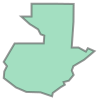

In [17]:
# Returns two arrays that hold the x and y coordinates of the points that define the polygon's exterior.
x, y = world.loc["GTM", "geometry"].exterior.coords.xy

# How many points?
print('Points in the exterior of Guatemala:', len(x))

world.loc["GTM", 'geometry']

Let’s see another

Points in the exterior of Pakistan: 69


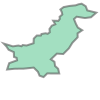

In [18]:

# Returns two arrays that hold the x and y coordinates of the points that define the polygon's exterior.
x, y = world.loc["AFG", 'geometry'].exterior.coords.xy

# How many points?
print('Points in the exterior of Pakistan:', len(x))

world.loc["PAK", "geometry"]

Points in the exterior of Ghana: 25


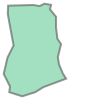

In [19]:

# Returns two arrays that hold the x and y coordinates of the points that define the polygon's exterior.
x, y = world.loc["GHA", 'geometry'].exterior.coords.xy

# How many points?
print('Points in the exterior of Ghana:', len(x))

world.loc["GHA", "geometry"]

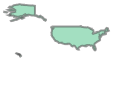

In [20]:
# Returns two arrays that hold the x and y coordinates of the points that define the polygon's exterior.
#x, y = world.loc["USA", 'geometry'].exterior.coords.xy # Notice the use of the .exterior attribute
#'MultiPolygon' object has no attribute 'exterior'

# How many points?
#print('Points in the exterior of United States:', len(x))

world.loc["USA", "geometry"]

Notice that we’ve now displayed USA.

This is a more complex shape than previous countries and thus required more points and polygons.

#### 2. Plotting the map

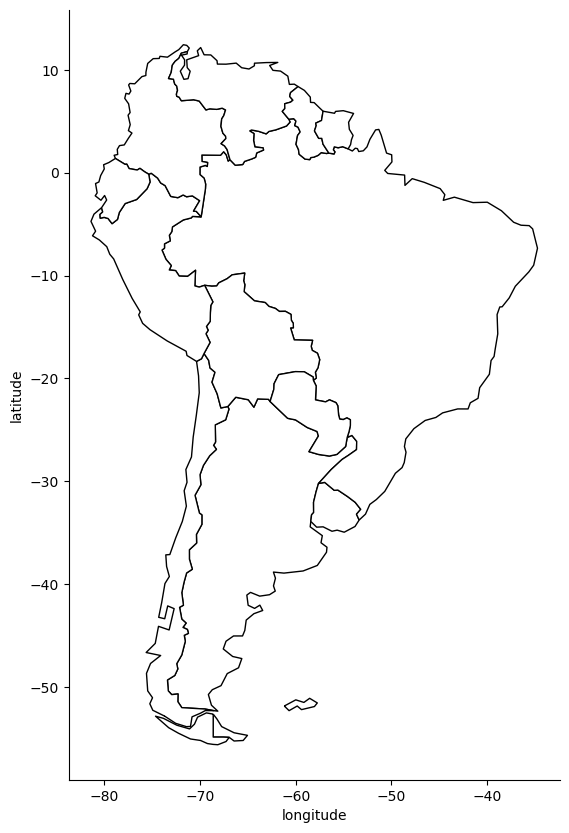

In [17]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("continent == 'South America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [22]:
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


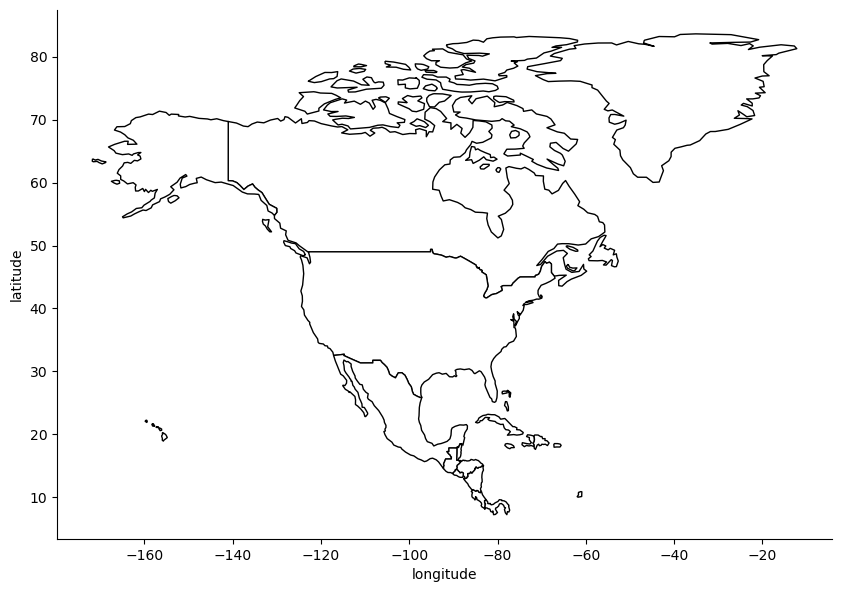

In [23]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("continent == 'North America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Creating this map may have been easier than you expected!

#### 3. Plot the cities

In the code below, we run the same commands as before to plot the South American countries, but
, now, we also plot the data in `gdf`, which contains the location of South American cities.

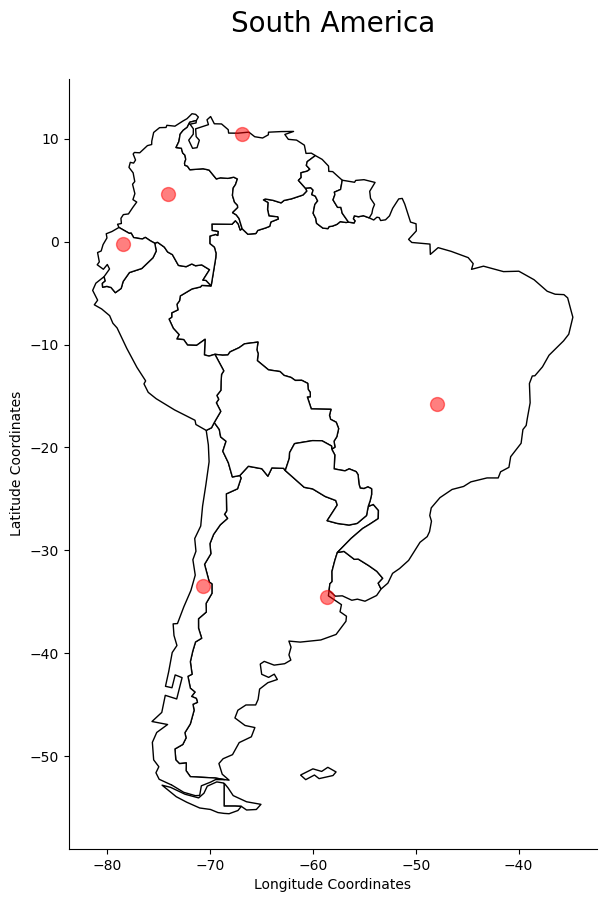

In [18]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
from matplotlib import markers
from numpy import size


fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("continent == 'South America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5, markersize=100)

gax.set_xlabel('Longitude Coordinates')
gax.set_ylabel('Latitude Coordinates')
gax.set_title('South America', fontsize=20, y=1.05) # The y=1.05 is a little hack to add some space between the title and the plot

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

**Adding labels to points**.

Finally, we might want to consider annotating the cities so we know which cities are which.

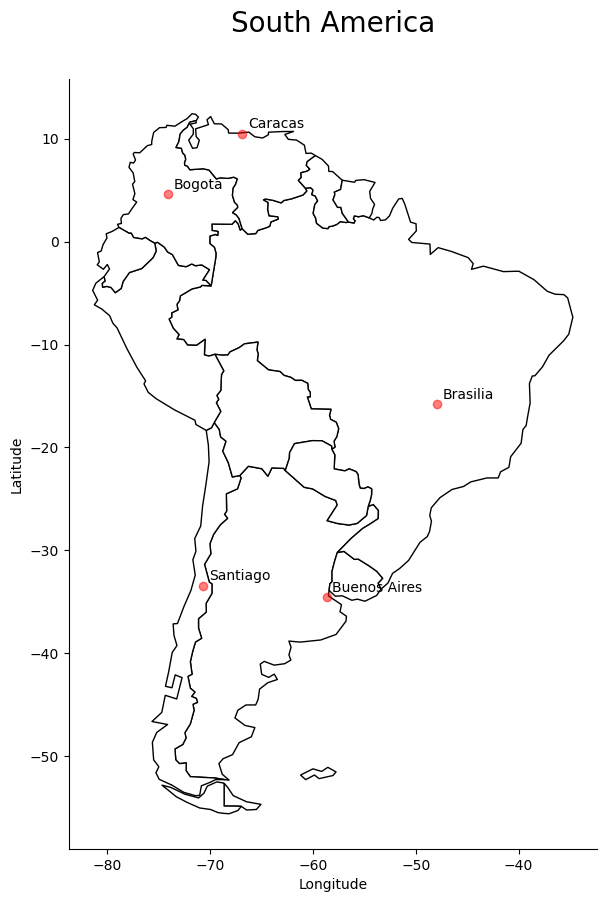

In [25]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well, South America.
world.query("continent == 'South America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame. I want the
# cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('South America', fontsize=20, y=1.05) 

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
# plt.axis('off')


# Label the cities
for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['City']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

### Find and Plot State Border

Our first step will be to find the border for the state of interest. This can be found on the [US
Census’s website here](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html).

You can download the `cb_2016_us_state_5m.zip` by hand, or simply allow `geopandas` to extract
the relevant information from the zip file online.

In [26]:
state_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_state_5m.zip")
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


In [27]:
print(state_df.columns)

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [28]:
# Manhattan Kansas Geometry Coordinates (Point Object)
df = pd.DataFrame({
    'City': ['Manhattan', 'Lawrence'],
    'State': ['KS', 'KS'],
    'Country': ['USA', 'USA'],
    'Latitude': [39.1886, 38.9597],
    'Longitude': [-96.6048, -95.2642]
})
df["Coordinates"] = list(zip(df.Longitude, df.Latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

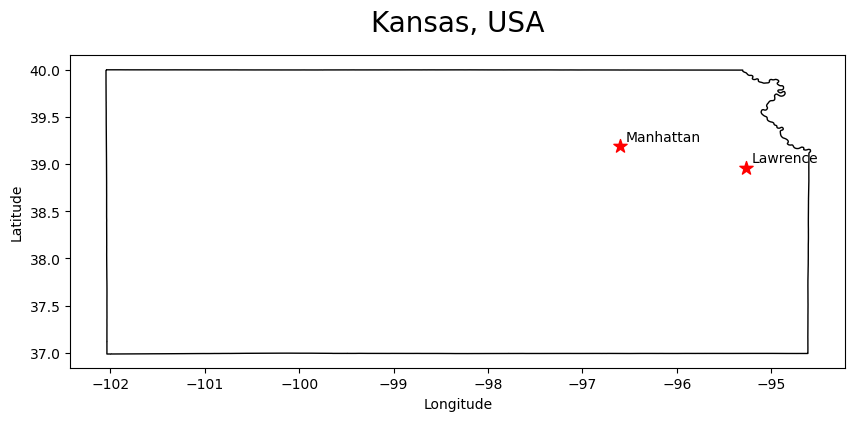

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd


df["Coordinates"] = list(zip(df.Longitude, df.Latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

# Plotting
fig, gax = plt.subplots(figsize=(10, 10))
state_df.query("NAME == 'Kansas'").plot(ax=gax, edgecolor="black", color="white")
gdf.plot(ax=gax, color='red', markersize=100, marker='*')  # Plot the point on the map

# Label the cities
for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['City']):
    gax.annotate(label, xy=(x, y), xytext=(4, 4), textcoords='offset points')

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Kansas, USA', fontsize=20, y=1.05) 
plt.show()

from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Kansas.svg/1200px-Flag_of_Kansas.svg.png')

We have various columns, but, most importantly, we can find the right geometry by filtering by name.

### *AD ASTRA PER ASPERA*: Through hardships to the stars
### *LABOR OMNIA VINCIT*: Hard work conquers all

### Find and Plot County Borders

Next, we will add the county borders to our map.

The county shape files (for the entire US) can be found on the [Census
site](https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html).

Once again, we will use the 5m resolution.

In [30]:
county_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip")
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.75562 36.08717, -114.75364 36.0..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52366 29.62243, -81.32406 29.625..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.72432 34.99521, -89.64428 34.995..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.31821 38.60002, -90.30183 38.655..."


In [31]:
print(county_df.columns)

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


Kansas’ FIPS code is 20 so we will make sure that we only keep those counties. FIPS Code https://unicede.air-worldwide.com/unicede/unicede_kansas_fips.html

In [32]:

county_df = county_df.query("STATEFP == '20'")
county_df.head()


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
10,20,109,00485019,0500000US20109,20109,Logan,06,2779042518,274632,"POLYGON ((-101.47819 39.13476, -101.39172 39.1..."
29,20,069,00485001,0500000US20069,20069,Gray,06,2250356168,1113338,"POLYGON ((-100.66417 38.00253, -100.22661 38.0..."
35,20,121,00485025,0500000US20121,20121,Miami,06,1490957045,37798210,"POLYGON ((-95.06577 38.69490, -95.05667 38.694..."
71,20,205,00485063,0500000US20205,20205,Wilson,06,1477377648,12056867,"POLYGON ((-95.96100 37.60376, -95.96088 37.734..."


In [33]:
all_county_df = pd.DataFrame(county_df.query("STATEFP == '20'"))

Now we can plot all counties in Kansas.

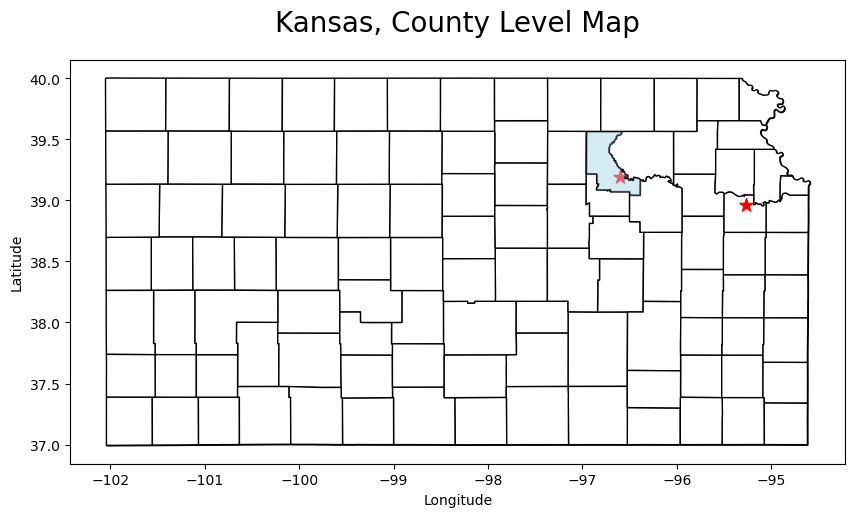

In [34]:
fig, gax = plt.subplots(figsize=(10, 10))

state_df.query("NAME == 'Kansas'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")
gdf.plot(ax=gax, color='red', markersize=100, marker='*') # Plot the point on the map
# Highlight Riley county in blue
county_df.query("NAME == 'Riley'").plot(ax=gax, edgecolor="black", color="lightblue", alpha=0.5)
gax.set_title('Kansas, County Level Map', fontsize=20, y=1.05)
gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')

plt.show()

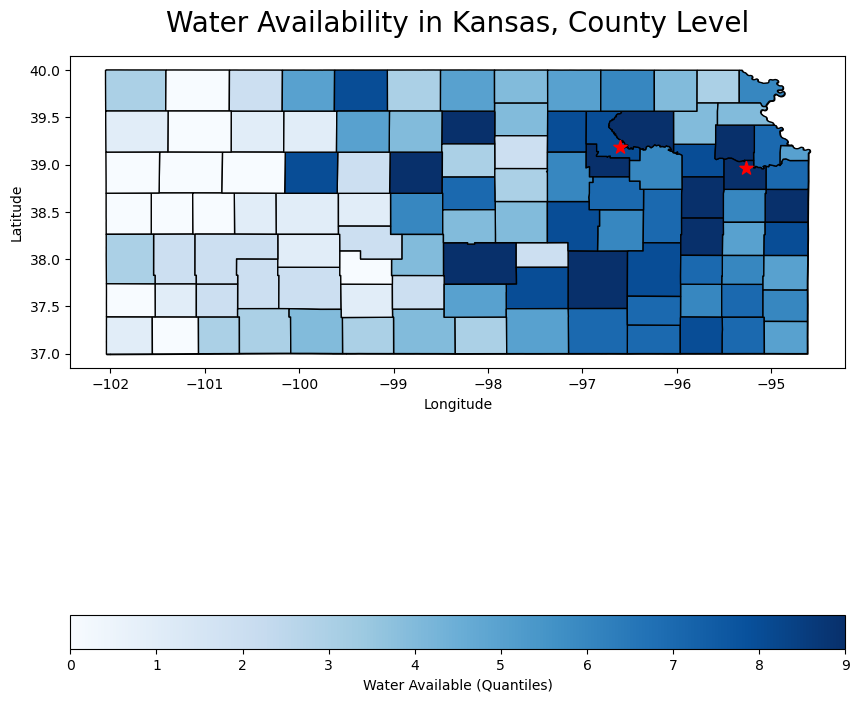

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np

#!pip install mapclassify #Install the package if needed
import mapclassify

fig, (gax, cax) = plt.subplots(nrows=2, figsize=(10, 10), 
                               gridspec_kw={"height_ratios": [1, 0.05]})

state_df.query("NAME == 'Kansas'").plot(ax=gax, edgecolor="black", color="white")
quantiles = mapclassify.Quantiles(county_df["AWATER"], k=10)
county_df['quantiles'] = quantiles.yb
county_df.plot(ax=gax, edgecolor="black", column='quantiles', cmap='Blues', legend=False)
gdf.plot(ax=gax, color='red', markersize=100, marker='*')  # Plot the point on the map
gax.set_title('Water Availability in Kansas, County Level', fontsize=20, y=1.05)
gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')

norm = mcolors.Normalize(vmin=quantiles.yb.min(), vmax=quantiles.yb.max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')

cax.set_xlabel('Water Available (Quantiles)')

plt.show()

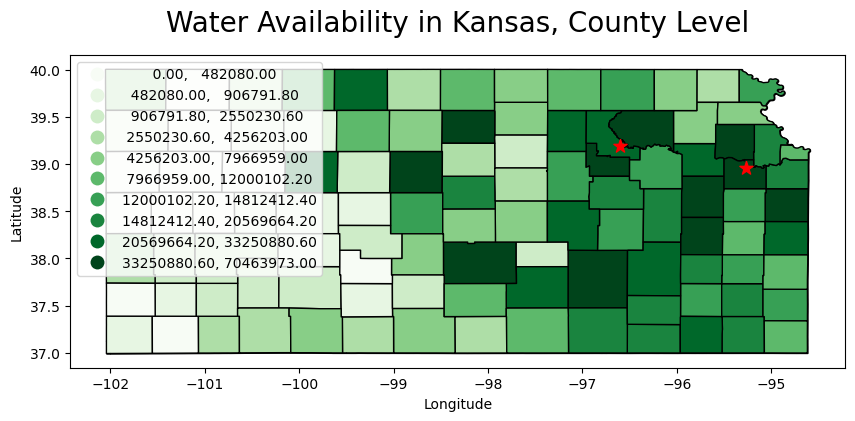

In [36]:
#!pip install mapclassify #Install the package if needed
import mapclassify

fig, gax = plt.subplots(figsize=(10, 10))

state_df.query("NAME == 'Kansas'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", column="AWATER", legend=True, 
               scheme='quantiles', k=10, cmap='Greens', 
               legend_kwds={'loc': 'upper left'})
gdf.plot(ax=gax, color='red', markersize=100, marker='*')  # Plot the point on the map
gax.set_title('Water Availability in Kansas, County Level', fontsize=20, y=1.05)
gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')

cax.set_xlabel('Water Available (Quantiles)')
plt.show()




## Case Study: Voting in Wisconsin

In the example that follows, we will demonstrate how each county in Wisconsin voted during the 2016
Presidential Election.

Along the way, we will learn a couple of valuable lessons:

1. Where to find shape files for US states and counties  
1. How to match census style data to shape files  

ValueError: aspect must be finite and positive 

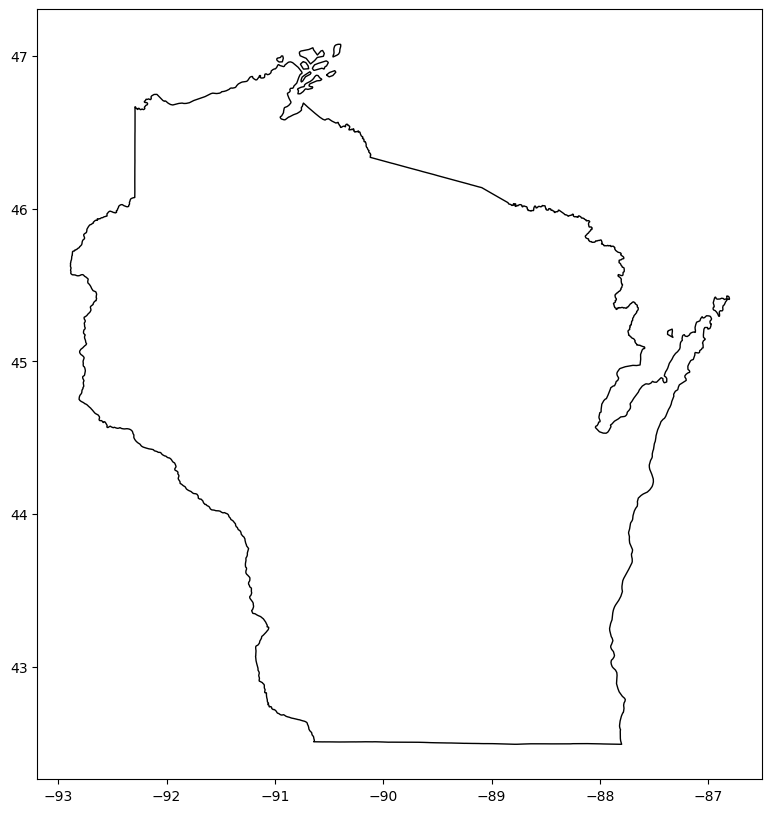

In [37]:
county_df = county_df.query("STATEFP == '55'")
fig, gax = plt.subplots(figsize=(10, 10))

state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")

plt.show()

### Get Vote Data

The final step is to get the vote data, which can be found online on [this site](https://elections.wi.gov/elections-voting/results/2016/fall-general).

Our friend Kim says,

> Go ahead and open up the file. It’s a mess! I saved a cleaned up version of the file to
`results.csv` which we can use to save the hassle with cleaning the data. For fun, you should
load the raw data and try beating it into shape. That’s what you normally would have to do…
and it’s fun.


We’d like to add that such an exercise is also “good for you” (similar to how vegetables are good for you).

But, for the example in class, we’ll simply start with his cleaned data.

In [ ]:
results = pd.read_csv("https://datascience.quantecon.org/assets/data/ruhl_cleaned_results.csv", thousands=",")
results.head()

,county,total,trump,clinton
0,ADAMS,10130,5966,3745
1,ASHLAND,8032,3303,4226
2,BARRON,22671,13614,7889
3,BAYFIELD,9612,4124,4953
4,BROWN,129011,67210,53382


Notice that this is NOT a GeoDataFrame; it has no geographical information.

But it does have the names of each county.

We will be able to use this to match to the counties from `county_df`.

First, we need to finish up the data cleaning.

In [ ]:
results["county"] = results["county"].str.title()
results["county"] = results["county"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()

Then, we can merge election results with the county data.

In [ ]:
res_w_states = county_df.merge(results, left_on="NAME", right_on="county", how="inner")

Next, we’ll create a new variable called `trump_share`, which will denote the percentage of votes that
Donald Trump won during the election.

In [ ]:
res_w_states["trump_share"] = res_w_states["trump"] / (res_w_states["total"])
res_w_states["rel_trump_share"] = res_w_states["trump"] / (res_w_states["trump"]+res_w_states["clinton"])
res_w_states.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county,total,trump,clinton,trump_share,rel_trump_share
0,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857...",Eau Claire,55025,23331,27340,0.424007,0.460441
1,55,113,01581116,0500000US55113,55113,Sawyer,06,3256410077,240690443,"POLYGON ((-91.55128 46.15704, -91.23838 46.157...",Sawyer,9137,5185,3503,0.567473,0.596800
2,55,101,01581111,0500000US55101,55101,Racine,06,861267826,1190381762,"POLYGON ((-88.30638 42.84210, -88.06992 42.843...",Racine,94302,46681,42641,0.495016,0.522615
3,55,097,01581109,0500000US55097,55097,Portage,06,2074100548,56938133,"POLYGON ((-89.84493 44.68494, -89.34592 44.681...",Portage,38589,17305,18529,0.448444,0.482921
4,55,135,01581127,0500000US55135,55135,Waupaca,06,1936525696,45266211,"POLYGON ((-89.22374 44.68136, -88.60516 44.678...",Waupaca,26095,16209,8451,0.621153,0.657299


Finally, we can create our map.

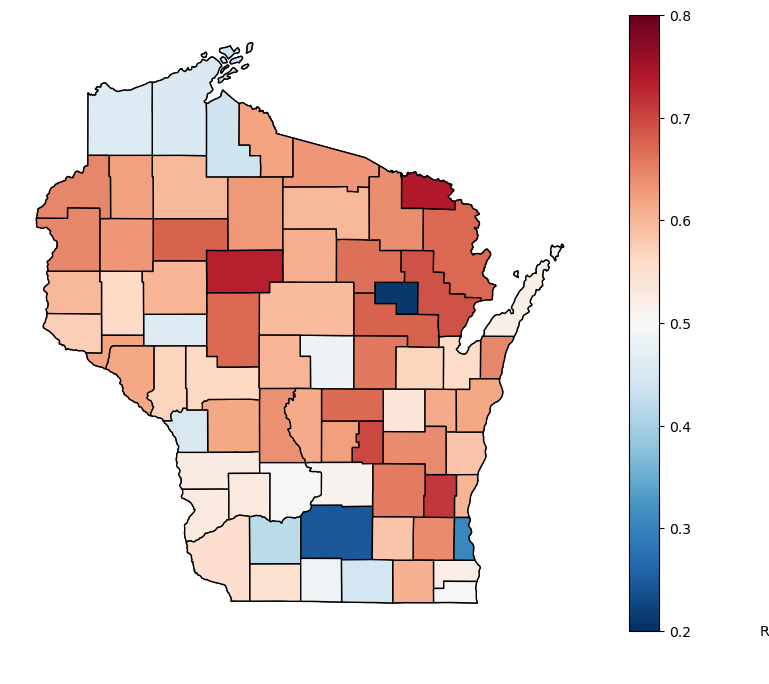

In [ ]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the state
state_df[state_df['NAME'] == 'Wisconsin'].plot(ax = gax, edgecolor='black',color='white')

# Plot the counties and pass 'rel_trump_share' as the data to color
res_w_states.plot(
    ax=gax, edgecolor='black', column='rel_trump_share', legend=True, cmap='RdBu_r',
    vmin=0.2, vmax=0.8
)

# Add text to let people know what we are plotting
gax.annotate('Republican vote share',xy=(0.76, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')

plt.show()

What do you see from this map?

How many counties did Trump win? How many did Clinton win?

In [ ]:
res_w_states.eval("trump > clinton").sum()

60

In [ ]:
res_w_states.eval("clinton > trump").sum()

12

Who had more votes? Do you think a comparison in counties won or votes won is more reasonable? Why
do you think they diverge?

In [ ]:
res_w_states["trump"].sum()

1405284

In [ ]:
res_w_states["clinton"].sum()

1382536

What story could you tell about this divergence?

### Interactivite MAPS

Multiple Python libraries can help create interactive figures.

Here, we will see an example using bokeh.

In the another lecture, we will see an example with folium.

In [ ]:
from bokeh.io import output_notebook   # This is the command to display the plot in the notebook
from bokeh.plotting import figure, ColumnDataSource    # This is the command to create a figure and a data source
from bokeh.io import output_notebook, show, output_file # This is the command to display the plot in the notebook
from bokeh.plotting import figure # This is the command to create a figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool # This is the command to create a data source
from bokeh.palettes import brewer # This is the command to import color palettes
output_notebook() # This is the command to display the plot in the notebook
import json # This is the command to import the json library
res_w_states["clinton_share"] = res_w_states["clinton"] / res_w_states["total"] # This is the command to calculate the share of the vote that went to Clinton
#Convert data to geojson for bokeh
wi_geojson=GeoJSONDataSource(geojson=res_w_states.to_json()) # This is the command to convert the data to geojson

Loading BokehJS ...

In [ ]:
color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 1)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@county'),('Portion Trump', '@trump_share'),
                               ('Portion Clinton','@clinton_share'),
                               ('Total','@total')])
p = figure(title="Presidential Election: Wisconsin Voting in 2016 ", tools=[hover])
p.title.align = 'center'  # Center the title
p.title.text_font_size = '18pt'  # Increase the title size
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'rel_trump_share', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)